In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../data/BFw_mission_data_daily.csv",
                 skipfooter=1, engine="python")
df.head()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 25 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   mission_created_date                            2569 non-null   object 
 1   mission_count_all                               2569 non-null   int64  
 2   mission_count_ems                               2569 non-null   int64  
 3   mission_count_ems_critical                      2569 non-null   int64  
 4   mission_count_ems_critical_cpr                  2569 non-null   int64  
 5   mission_count_fire                              2569 non-null   int64  
 6   mission_count_technical_rescue                  2569 non-null   int64  
 7   response_time_ems_critical_mean                 2569 non-null   float64
 8   response_time_ems_critical_median               2569 non-null   float64
 9   response_time_ems_critical_std           

In [10]:
df.tail()

,mission_created_date,mission_count_all,mission_count_ems,mission_count_ems_critical,mission_count_ems_critical_cpr,mission_count_fire,mission_count_technical_rescue,response_time_ems_critical_mean,response_time_ems_critical_median,response_time_ems_critical_std,...,response_time_fire_time_to_first_pump_std,response_time_fire_time_to_first_ladder_mean,response_time_fire_time_to_first_ladder_median,response_time_fire_time_to_first_ladder_std,response_time_fire_time_to_full_crew_mean,response_time_fire_time_to_full_crew_median,response_time_fire_time_to_full_crew_std,response_time_technical_rescue_mean,response_time_technical_rescue_median,response_time_technical_rescue_std
2564,2025-01-10,1569,1379,1029,22,38,87,653.067181,620.5,216.975087,...,167.093903,739.521739,702.0,170.087643,808.595667,783.4550,140.215548,976.250000,822.0,485.129150
2565,2025-01-11,1468,1341,1008,17,51,43,625.286349,593.0,199.109155,...,85.837869,711.461538,676.0,146.745026,721.704500,700.2380,141.806184,771.709677,646.0,408.873916
2566,2025-01-12,1399,1275,955,13,45,34,612.375576,585.0,185.059271,...,134.607896,668.437500,682.0,128.434143,738.547300,738.7920,118.935673,928.793103,798.0,402.349384
2567,2025-01-13,1555,1392,1061,17,73,49,633.629032,599.5,219.719336,...,128.534652,668.724138,683.0,151.054129,761.414222,764.7600,108.435931,729.775000,661.5,264.616460
2568,2025-01-14,1502,1355,1295,14,55,47,646.732548,621.0,202.256889,...,143.659332,665.391304,639.0,120.398482,812.261143,777.3135,122.631201,829.648649,780.0,313.186687


In [16]:
df[["mission_count_fire", "mission_count_ems"]].sum()

mission_count_fire     122573
mission_count_ems     3162698
dtype: int64

<Axes: >

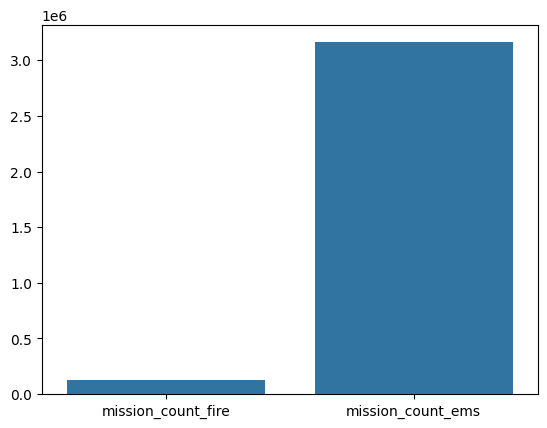

In [17]:
sns.barplot(df[["mission_count_fire", "mission_count_ems"]].sum())

<Axes: xlabel='mission_created_date', ylabel='mission_count_all'>

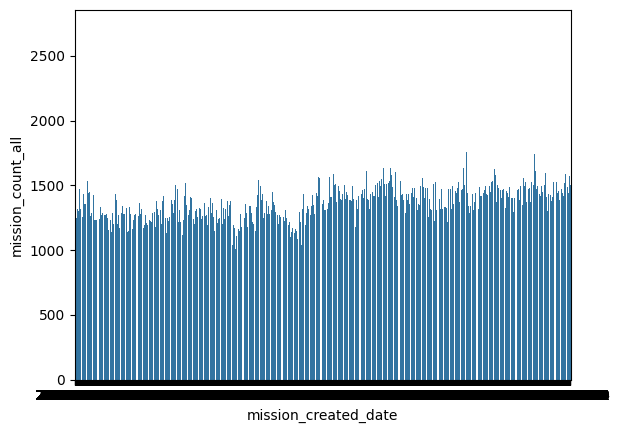

In [25]:
sns.barplot(df, x="mission_created_date", y="mission_count_all")

In [29]:
df["mission_created_date"] = pd.to_datetime(df["mission_created_date"])

In [30]:
df["month"] = df["mission_created_date"].dt.month
df["year"] = df["mission_created_date"].dt.year
df["day"] = df["mission_created_date"].dt.day

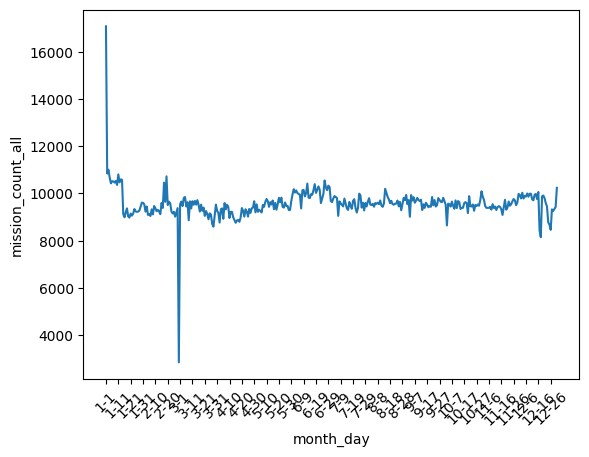

In [51]:
mission_counts_by_day = df.groupby(["month", "day"])["mission_count_all"].sum().reset_index()

# Create a new column for plotting purposes
mission_counts_by_day["month_day"] = mission_counts_by_day["month"].astype(str) + "-" + mission_counts_by_day["day"].astype(str)

sns.lineplot(data=mission_counts_by_day, x="month_day", y="mission_count_all")

# Show every 7th tick
plt.xticks(ticks=range(0, len(mission_counts_by_day), 10), rotation=45)
plt.show()


In [63]:
mean_columns = df.filter(like='mean', axis=1)
mean_columns.columns = [col if col.endswith('_mean') else col + '_mean' for col in mean_columns.columns]
print(mean_columns.head())

   response_time_ems_critical_mean  response_time_ems_critical_cpr_mean  \
0                       591.094092                           509.176471   
1                       610.484848                           557.529412   
2                       613.666327                           503.235294   
3                       612.727463                           560.428571   
4                       600.722048                           477.300000   

   response_time_fire_time_to_first_pump_mean  \
0                                  668.621951   
1                                  530.538462   
2                                  580.583333   
3                                  574.416667   
4                                  541.964286   

   response_time_fire_time_to_first_ladder_mean  \
0                                    905.597015   
1                                    585.571429   
2                                    657.888889   
3                                    662.347826   

/var/folders/t5/m580657s5rxblthmnv5y6vfm0000gn/T/ipykernel_32244/2777123540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_columns["month"] = df["month"]
/var/folders/t5/m580657s5rxblthmnv5y6vfm0000gn/T/ipykernel_32244/2777123540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_columns["day"] = df["day"]


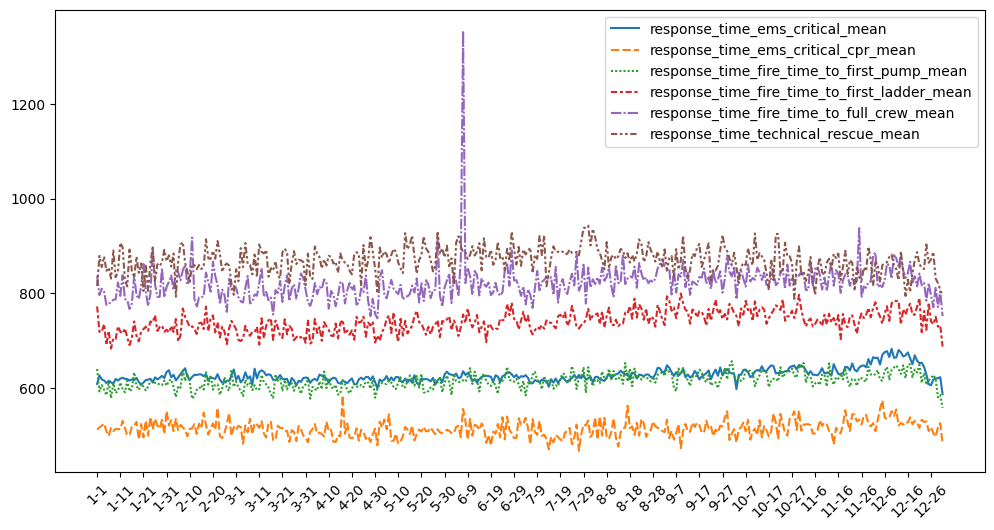

In [69]:

mean_columns["month"] = df["month"]
mean_columns["day"] = df["day"]
mean_data = mean_columns.groupby(["month", "day"]).mean().reset_index()
mean_data.index = mean_data["month"].astype(str) + "-" + mean_data["day"].astype(str)
mean_data.drop(columns=["month", "day"], inplace=True)


plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_data)
plt.xticks(ticks=range(0, len(mission_counts_by_day), 10), rotation=45);